# C318 - Tópicos Especiais - Inatel
### Grupo
#### Nome: Leonardo Galisse
#### Nome: Bárbara Barbieri
#### Nome: Arthur Ferreira
#### Nome: Leonardo Mendonça

## 1) Importação das bibliotecas necessárias


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             recall_score, precision_score, roc_curve, auc, 
                             precision_recall_curve, average_precision_score)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.metrics import ConfusionMatrixDisplay

## 2) Carregar os dados do arquivo CSV

In [2]:
dados = pd.read_csv('data.csv')

#### Substituir valores na coluna 'class' por 'yes' ou 'no'

In [3]:
recurrence = ['no', 'yes']
dados["recurrence"] = dados["class"].map({1: recurrence[0], 2: recurrence[1]})
dados.drop(columns=["class"], inplace=True)

## 3) Análise Exploratória

In [4]:
# Visualização dos primeiros registros e verificação de valores ausentes
print("Primeiras linhas do conjunto de dados:")
print(dados.head())
print("\nValores ausentes no conjunto de dados:")
print(dados.isna().any())

Primeiras linhas do conjunto de dados:
   age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast   
0    3          3           7          1          1          3       1  \
1    4          3           5          1          1          2       2   
2    4          3           5          1          1          2       1   
3    6          2           4          1          1          2       2   
4    4          3           1          1          1          2       2   

   breast-quad  irradiat recurrence  
0            2         1         no  
1            3         1         no  
2            2         1         no  
3            1         1         no  
4            4         1         no  

Valores ausentes no conjunto de dados:
age            False
menopause      False
tumor-size     False
inv-nodes      False
node-caps      False
deg-malig      False
breast         False
breast-quad    False
irradiat       False
recurrence     False
dtype: bool


#### Visualização de dispersão (scatterplot) de 'age' e 'menopause' com base na recorrência


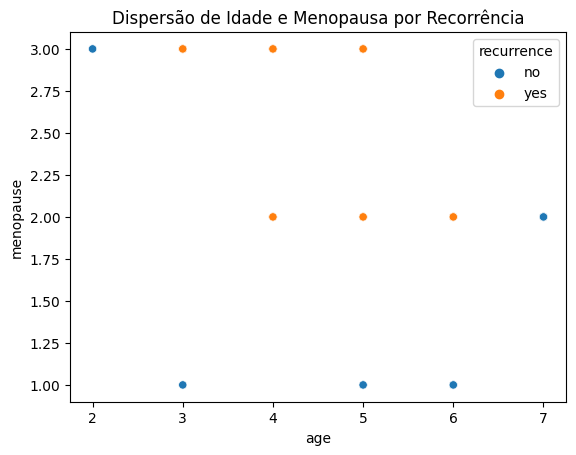

In [5]:
sns.scatterplot(data=dados, x="age", y="menopause", hue="recurrence")
plt.title('Dispersão de Idade e Menopausa por Recorrência')
plt.show()

In [6]:
X = dados.iloc[:, :-1]  # Exclui a coluna 'recurrence'
y = dados['recurrence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treino: 221
Tamanho do conjunto de teste: 56


## 4) Criação e Treinamento dos Modelos

In [7]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "MLP": MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=[200, 80, 100])
}

In [8]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Relatório de classificação
    print(f"\nRelatório de Classificação - {model_name}:")
    print(classification_report(y_test, y_pred, target_names=recurrence))
    
    # Acurácia
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia: {accuracy}")
    
    # Matriz de Confusão
    print(f"Matriz de Confusão - {model_name}:")
    print(confusion_matrix(y_test, y_pred))


Relatório de Classificação - Decision Tree:
              precision    recall  f1-score   support

          no       0.67      0.76      0.71        37
         yes       0.36      0.26      0.30        19

    accuracy                           0.59        56
   macro avg       0.51      0.51      0.51        56
weighted avg       0.56      0.59      0.57        56

Acurácia: 0.5892857142857143
Matriz de Confusão - Decision Tree:
[[28  9]
 [14  5]]

Relatório de Classificação - MLP:
              precision    recall  f1-score   support

          no       0.73      0.73      0.73        37
         yes       0.47      0.47      0.47        19

    accuracy                           0.64        56
   macro avg       0.60      0.60      0.60        56
weighted avg       0.64      0.64      0.64        56

Acurácia: 0.6428571428571429
Matriz de Confusão - MLP:
[[27 10]
 [10  9]]


## 5) Avaliação dos Modelos

In [9]:
# Analisando Recall, Precisão e ROC para o modelo DecisionTree
y_test_encoded = LabelEncoder().fit_transform(y_test)

# DecisionTree
y_pred_tree = models["Decision Tree"].predict(X_test)
y_pred_tree_encoded = LabelEncoder().fit_transform(y_pred_tree)

# Cálculo de Recall e Precisão
recall_yes = recall_score(y_test_encoded, y_pred_tree_encoded, pos_label=1)
recall_no = recall_score(y_test_encoded, y_pred_tree_encoded, pos_label=0)
precision_yes = precision_score(y_test_encoded, y_pred_tree_encoded, pos_label=1)
precision_no = precision_score(y_test_encoded, y_pred_tree_encoded, pos_label=0)

print(f"Recall 'yes': {recall_yes}")
print(f"Recall 'no': {recall_no}")
print(f"Precisão 'yes': {precision_yes}")
print(f"Precisão 'no': {precision_no}")

Recall 'yes': 0.2631578947368421
Recall 'no': 0.7567567567567568
Precisão 'yes': 0.35714285714285715
Precisão 'no': 0.6666666666666666


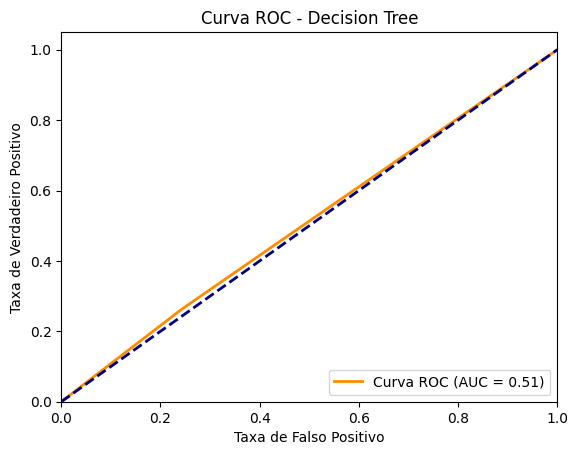

In [10]:
# Calculando e Plotando a Curva ROC
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_tree_encoded)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Decision Tree')
plt.legend(loc="lower right")
plt.show()

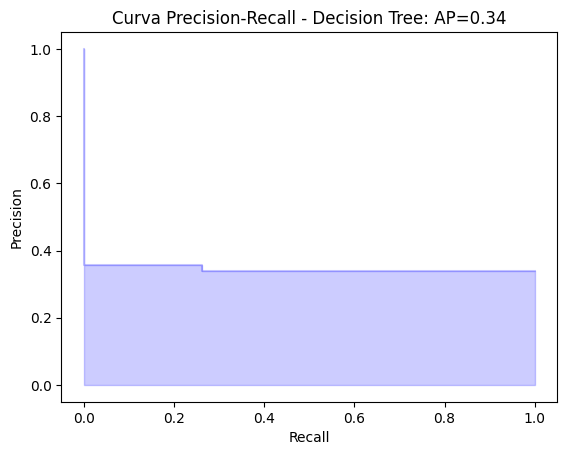

In [11]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_encoded, y_pred_tree_encoded)
average_precision = average_precision_score(y_test_encoded, y_pred_tree_encoded)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Curva Precision-Recall - Decision Tree: AP={average_precision:.2f}')
plt.show()

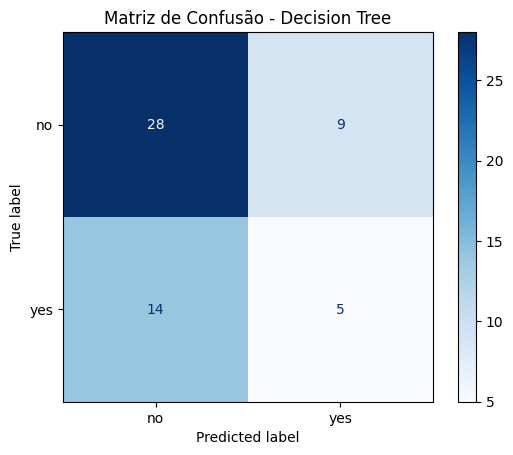

In [12]:
# Matriz de Confusão
ConfusionMatrixDisplay.from_estimator(models["Decision Tree"], X_test, y_test, cmap='Blues')
plt.title('Matriz de Confusão - Decision Tree')
plt.show()

## 6) Soluções Gráficas para avaliações dos modelos

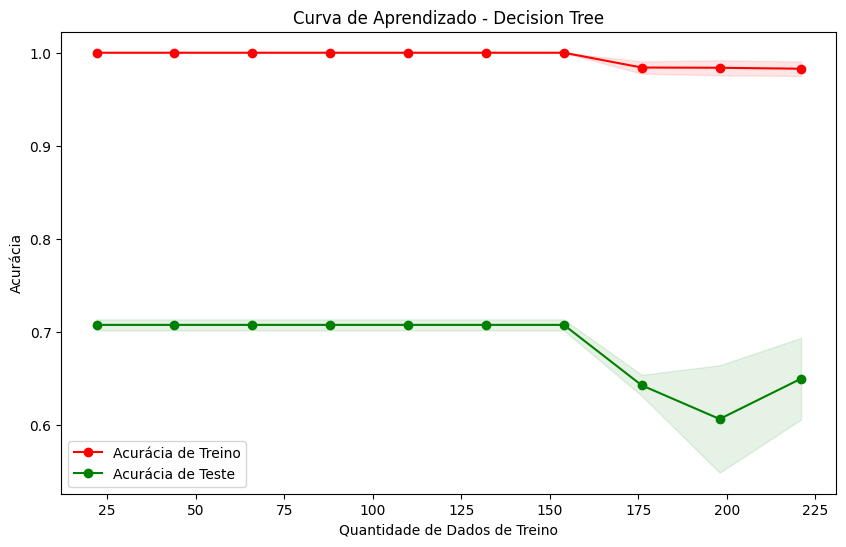

In [13]:
# Curva de Aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    models["Decision Tree"], X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Acurácia de Treino")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Acurácia de Teste")
plt.xlabel("Quantidade de Dados de Treino")
plt.ylabel("Acurácia")
plt.title("Curva de Aprendizado - Decision Tree")
plt.legend(loc="best")
plt.show()


## 7) Realização de predições com os modelos treinados

In [14]:
# Previsão Interativa
entrada = input("Entre com os valores de (age, menopause, tumor-size, inv-nodes, node-caps, deg-malig, breast, breast-quad, irradiat): ").split(",")
entrada = list(map(int, entrada))
entrada_df = pd.DataFrame([entrada], columns=X.columns)

print(f"Predição Decision Tree: {models['Decision Tree'].predict(entrada_df)}")
print(f"Predição MLP: {models['MLP'].predict(entrada_df)}")

Entre com os valores de (age, menopause, tumor-size, inv-nodes, node-caps, deg-malig, breast, breast-quad, irradiat):  3, 3, 7, 1, 1, 3, 1, 2, 1


Predição Decision Tree: ['no']
Predição MLP: ['yes']
